# Sales Forecasting Dashboard

## Objective
To analyze historical sales data and forecast future sales trends using Python and visualize insights using Power BI.

## Dataset
Superstore Sales Dataset (Kaggle – Rohit Sahoo)

## Tools Used
- Python (Pandas, Matplotlib)
- Power BI

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("../Data/superstore_sales.csv")

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df.shape

(9800, 18)

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
df['Order Date'].head(10)

0    08/11/2017
1    08/11/2017
2    12/06/2017
3    11/10/2016
4    11/10/2016
5    09/06/2015
6    09/06/2015
7    09/06/2015
8    09/06/2015
9    09/06/2015
Name: Order Date, dtype: object

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [18]:
df['Order Date'].isna().sum()

np.int64(5841)

In [19]:
df = df.dropna(subset=['Order Date'])

In [20]:
df.shape

(3959, 18)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3959 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3959 non-null   int64         
 1   Order ID       3959 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      3959 non-null   object        
 4   Ship Mode      3959 non-null   object        
 5   Customer ID    3959 non-null   object        
 6   Customer Name  3959 non-null   object        
 7   Segment        3959 non-null   object        
 8   Country        3959 non-null   object        
 9   City           3959 non-null   object        
 10  State          3959 non-null   object        
 11  Postal Code    3955 non-null   float64       
 12  Region         3959 non-null   object        
 13  Product ID     3959 non-null   object        
 14  Category       3959 non-null   object        
 15  Sub-Category   3959 non-nu

In [22]:
df['Order Date'].head()

0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
Name: Order Date, dtype: datetime64[ns]

In [23]:
df['Year'] = df['Order Date'].dt.year

In [24]:
df['Month'] = df['Order Date'].dt.month

In [25]:
df['Month_Name'] = df['Order Date'].dt.month_name()

In [26]:
df[['Order Date', 'Year', 'Month', 'Month_Name']].head()

,Order Date,Year,Month,Month_Name
0,2017-08-11,2017,8,August
1,2017-08-11,2017,8,August
2,2017-12-06,2017,12,December
3,2016-11-10,2016,11,November
4,2016-11-10,2016,11,November


In [27]:
monthly_sales = (
    df
    .groupby(['Year', 'Month'], as_index=False)['Sales']
    .sum()
)

In [28]:
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])
monthly_sales.head()

,Year,Month,Sales
0,2015,1,19546.163
1,2015,2,11678.994
2,2015,3,6716.044
3,2015,4,12455.482
4,2015,5,15165.051


In [29]:
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str) + '-01'
)

In [30]:
monthly_sales = monthly_sales.sort_values('Date')
monthly_sales.head()

,Year,Month,Sales,Date
0,2015,1,19546.163,2015-01-01
1,2015,2,11678.994,2015-02-01
2,2015,3,6716.044,2015-03-01
3,2015,4,12455.482,2015-04-01
4,2015,5,15165.051,2015-05-01


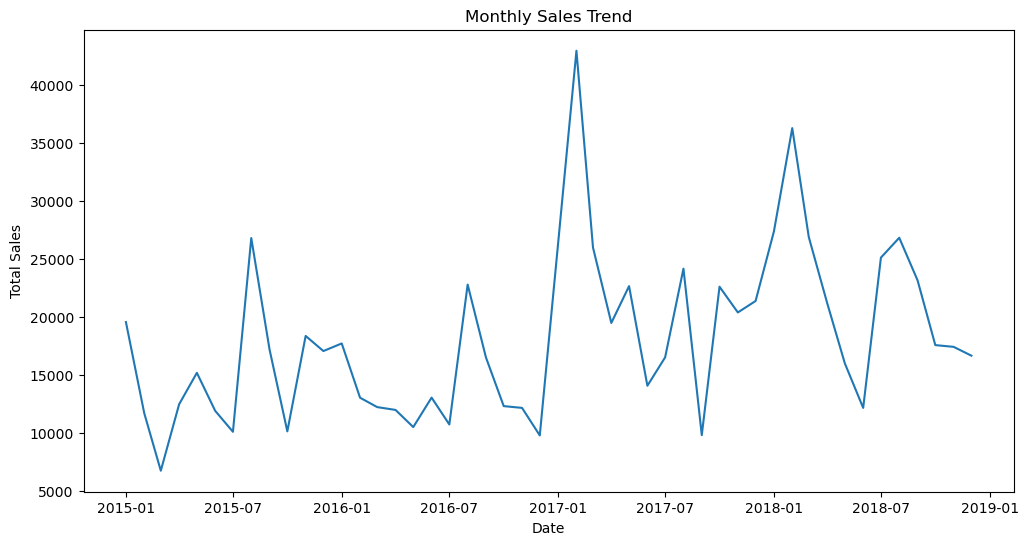

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### Monthly Sales Trend Insight

The line chart shows an overall upward trend in sales with noticeable seasonal fluctuations. 
Certain months experience higher sales, indicating possible seasonal demand patterns.

In [32]:
monthly_sales.to_csv('../Data/monthly_sales.csv', index=False)